In [1]:
import pickle
import numpy as np
import random
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [2]:
f_train=open("train_dataset.pickle","rb")
train_data=pickle.load(f_train)
# np.random.shuffle(train_data)
f_test=open("test_dataset.pickle","rb")
test_data=pickle.load(f_test)

In [3]:
train_x=train_data[:,0]
train_y= train_data[:,1]
test_x=test_data[:,0]
test_y= test_data[:,1]

In [4]:
train_sets_x=np.split(train_x,20)
train_sets_y=np.split(train_y,20)

In [5]:
bias=[]
bias2=[]
mse=[]
irr=[]
variance=[]
for i in range(1,16):
    predict=[]
    poly=PolynomialFeatures(degree=i)
    for j in range(20):
        train_ready_data=poly.fit_transform(train_sets_x[j].reshape(-1,1))
        model =LinearRegression().fit(train_ready_data,train_sets_y[j].reshape(-1,1))
        
        test_ready_data=poly.fit_transform(test_x.reshape(-1,1))
        predict.append(model.predict(test_ready_data))
    bias_set=[]
    bias_set2=[]
    errors=[]
    
    var_array=np.var(predict,axis=0)
    variance.append(np.mean(var_array))
    
    for j in range(200):
        mean=0
        error=0
        for k in range(20):
            mean+=predict[k][j]
            error+=(predict[k][j]-test_y[j])**2
        mean=mean/20
        error=error/20
        bias_val=abs(mean-test_y[j])
        bias_set.append(bias_val)
        bias_set2.append(bias_val*bias_val) 
        errors.append(error)
    mse.append(np.mean(errors))
    bias.append(np.mean(bias_set))
    bias2.append(np.mean(bias_set2))
    irr.append(np.mean(errors)-np.mean(var_array)-np.mean(bias_set2))

In [6]:
table = {
        'DEGREE' : range(1,16),
        'BIAS': bias,
        'BIAS^2' : bias2,
        'VARIANCE': variance,
        'MSE' : mse,
        'IRREDUCIBLE ERROR': irr,
     }
print(tabulate(table,headers='keys',tablefmt='psql'))

+----------+-----------+------------+-------------+------------+---------------------+
|   DEGREE |      BIAS |     BIAS^2 |    VARIANCE |        MSE |   IRREDUCIBLE ERROR |
|----------+-----------+------------+-------------+------------+---------------------|
|        1 | 0.269398  | 0.114392   | 0.00868095  | 0.123073   |        -1.38778e-17 |
|        2 | 0.0862565 | 0.0121412  | 0.00122436  | 0.0133656  |         1.73472e-18 |
|        3 | 0.0332718 | 0.00470811 | 0.000337339 | 0.00504545 |         1.04083e-17 |
|        4 | 0.0242826 | 0.0042391  | 0.000366999 | 0.0046061  |         2.60209e-18 |
|        5 | 0.0238793 | 0.00419759 | 0.000461938 | 0.00465952 |        -8.67362e-19 |
|        6 | 0.0239554 | 0.00419841 | 0.00058152  | 0.00477993 |        -2.60209e-18 |
|        7 | 0.02483   | 0.00418638 | 0.000916796 | 0.00510317 |         3.46945e-18 |
|        8 | 0.0248874 | 0.00426172 | 0.00176092  | 0.00602264 |         8.67362e-19 |
|        9 | 0.0304184 | 0.00485845 | 0.008

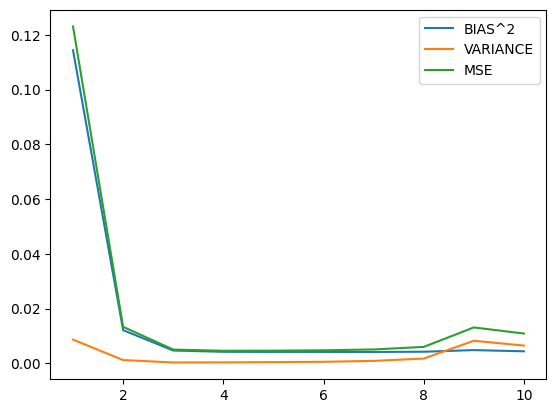

In [7]:
xaxis = range(1, 11)
field1 = bias2[0:10]
field2 = variance[0:10]
field3 = mse[0:10]

plt.plot(xaxis, field1)
plt.plot(xaxis, field2)
plt.plot(xaxis, field3)
plt.legend(['BIAS^2','VARIANCE','MSE'])

plt.show()